# **Regression Project: Boston House Price Prediction**

# **Marks: 60**

Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

## **Importing the necessary libraries and overview of the dataset**

In [3]:
# Import libraries for data manipulation
import pandas as pd

import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt

import seaborn as sns

from statsmodels.graphics.gofplots import ProbPlot

# Import libraries for building linear regression model
from statsmodels.formula.api import ols

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

### **Loading the data**

In [4]:
df = pd.read_csv("Boston.csv")

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**Observation:**

* The price of the house indicated by the variable MEDV is the target variable and the rest of the variables are independent variables based on which we will predict the house price (MEDV).

### **Checking the info of the data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


**Observations:**

- There are a total of **506 non-null observations in each of the columns**. This indicates that there are **no missing values** in the data.
- There are **13 columns** in the dataset and **every column is of numeric data type**.

## **Exploratory Data Analysis and Data Preprocessing**

### **Summary Statistics of this Dataset**

### **Question 1:** Write the code to find the summary statistics and write your observations based on that. (4 Marks)

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


Observations: The .describe() method allows you to read the summary statistics of a dataset. From this table we can observe the following:
- The count which is the total number of entries in the data set
- The mean which is the average of all the entries
- The std which is the standard deviation which shows the dispersion of the mean
- The min which is the minimum value
- The 25% which is the 25th percentile which can be also called the first inter quartile range
- The 50% which is the 50th percentile which can also be called the median
- The 75% which is the 75th percentile which can also be called the second quartile range
- The max which is the maximum value

### **Univariate Analysis**

**Let's check the distribution of the variables**

### **Question 2:** Write your observations based on the below univariate plots. (4 Marks)

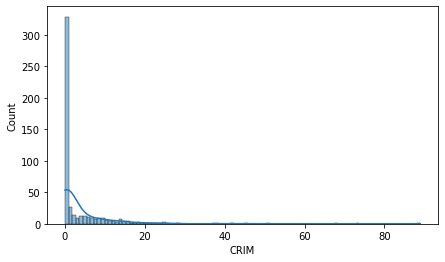

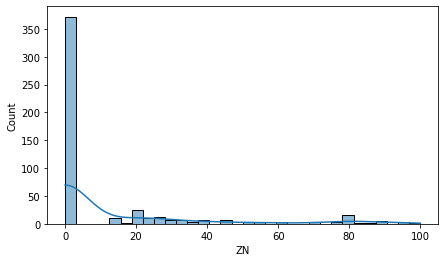

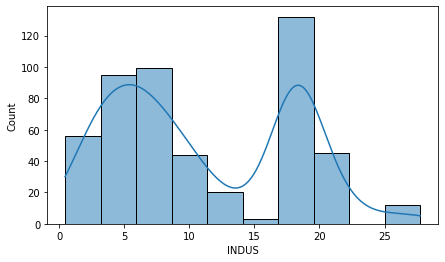

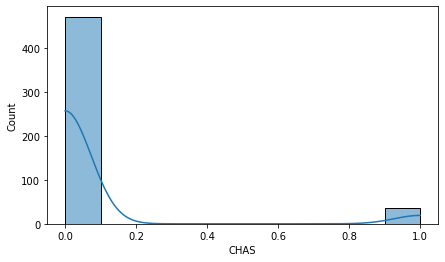

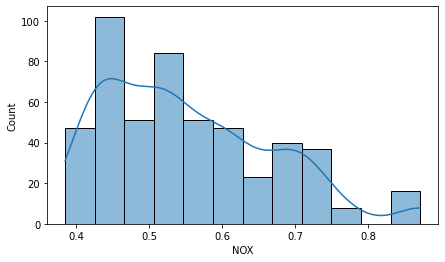

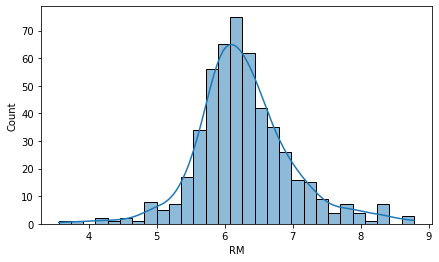

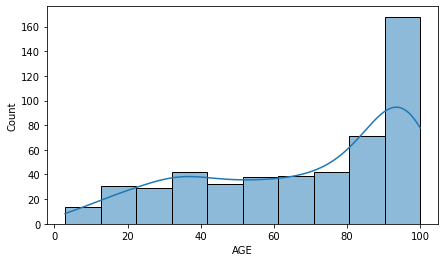

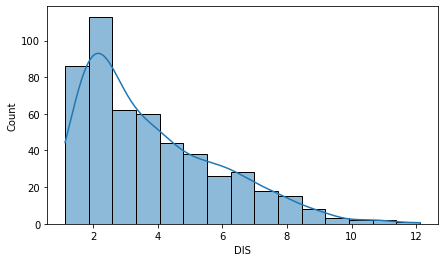

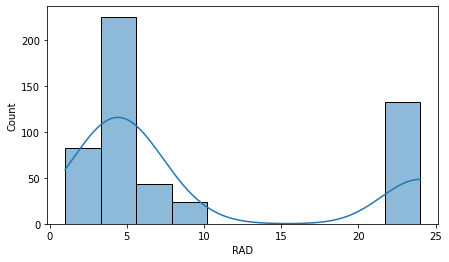

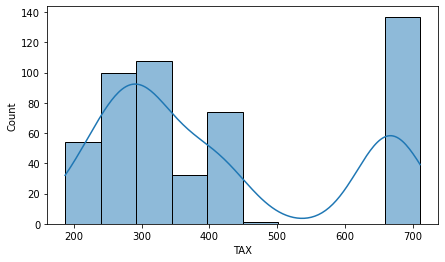

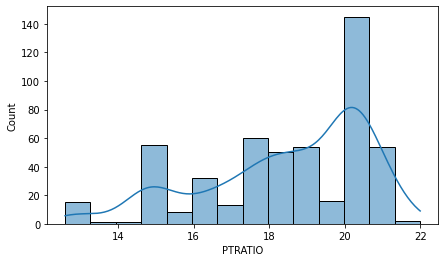

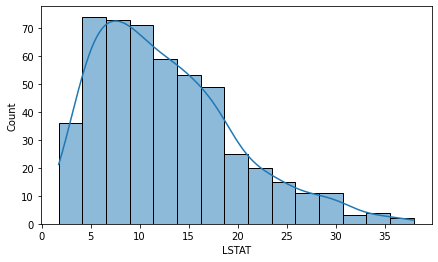

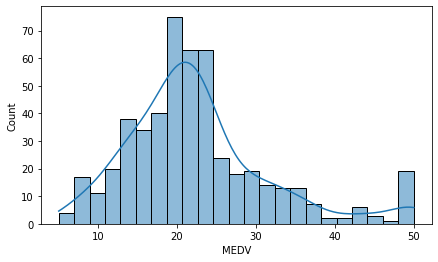

In [15]:
# Plotting all the columns to look at their distributions
for i in df.columns:
    
    plt.figure(figsize = (7, 4))
    
    sns.histplot(data = df, x = i, kde = True)
    
    plt.show()

**Observations: We can see from this dataset that overall we have a very balanced dataset with exception of per capita crime rate per town and proportion of residential land zoned for lots over 25,000 sq.ft. this can be a bad because then we can't see the effect of the crime rate on the housing prices and the same thing for the residential land zoned for lots over 25,000 sq.ft. which might result in biased predictions.**

As the dependent variable is sightly skewed, we will apply a **log transformation on the 'MEDV' column** and check the distribution of the transformed column.

In [ ]:
df['MEDV_log'] = np.log(df['MEDV'])

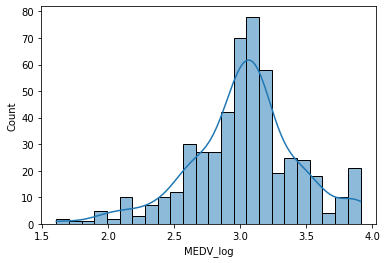

In [ ]:
sns.histplot(data = df, x = 'MEDV_log', kde = True)

**Observation:**

- The log-transformed variable (**MEDV_log**) appears to have a **nearly normal distribution without skew**, and hence we can proceed.

Before creating the linear regression model, it is important to check the bivariate relationship between the variables. Let's check the same using the heatmap and scatterplot.

### **Bivariate Analysis**

**Let's check the correlation using the heatmap**

### **Question 3:** Write the code to plot the correlation heatmap and write your observations based on that. (6 Marks)

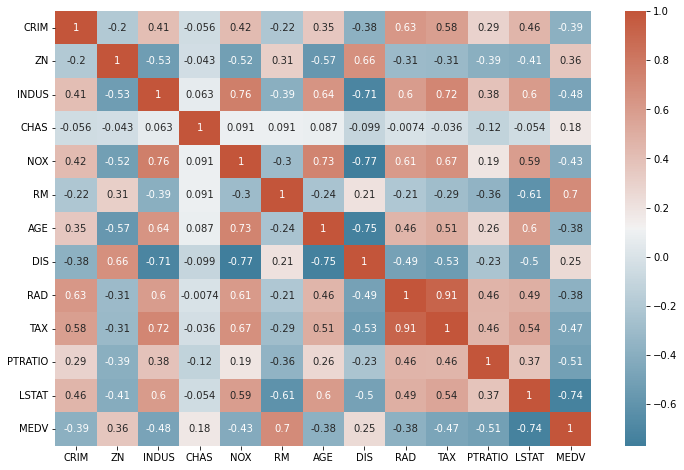

In [11]:
plt.figure(figsize = (12, 8))

cmap = sns.diverging_palette(230, 20, as_cmap = True)

sns.heatmap(df.corr(), annot=True,cmap=cmap)

plt.show()

**Observations: Obviously the greatest correlations are from a variable to itself. Aside from that, the biggest correlations we can see in this map are from "Index of accessibility to radial highways" to "Full-value property-tax rate per 10,000 dollars" and viceversa as well. The least correlated variables on the other hand are from "Weighted distances to five Boston employment centers" to "Nitric Oxide concentration (parts per 10 million)"**

Now, we will visualize the relationship between the pairs of features having significant correlations.

### **Visualizing the relationship between the features having significant correlations (>= 0.7 or <= -0.7)**

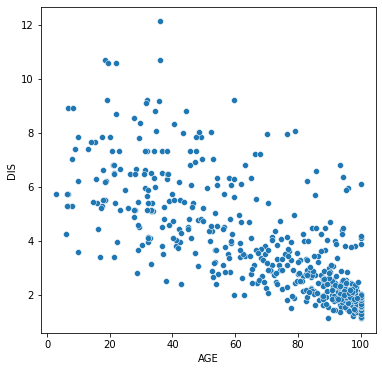

In [ ]:
# Scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'AGE', y = 'DIS', data = df)

plt.show()

**Observations:**
- The distance of the houses to the Boston employment centers appears to decrease moderately as the the proportion of the old houses increase in the town. It is possible that the Boston employment centers are located in the established towns where proportion of owner-occupied units built prior to 1940 is comparatively high.

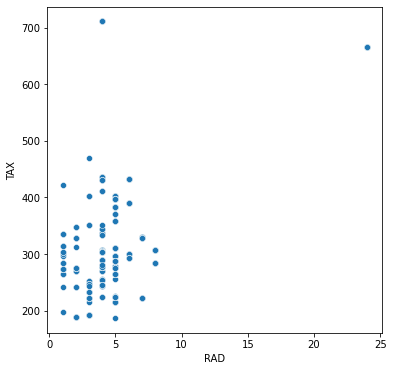

In [ ]:
# Scatterplot to visulaize the relationship between RAD and TAX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'RAD', y = 'TAX', data = df)

plt.show()

**Observations:**

- The correlation between RAD and TAX is very high. But, no trend is visible between the two variables. 
- The strong correlation might be due to outliers. 

Let's check the correlation after removing the outliers.

In [12]:
# Remove the data corresponding to high tax rate
df1 = df[df['TAX'] < 600]

# Import the required function
from scipy.stats import pearsonr

# Calculate the correlation
print('The correlation between TAX and RAD is', pearsonr(df1['TAX'], df1['RAD'])[0])

The correlation between TAX and RAD is 0.24975731331429196


**Observation:**

- So, the high correlation between TAX and RAD is due to the outliers. The tax rate for some properties might be higher due to some other reason.

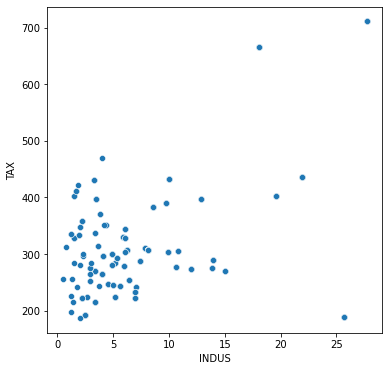

In [ ]:
# Scatterplot to visualize the relationship between INDUS and TAX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'INDUS', y = 'TAX', data = df)

plt.show()

**Observations:**

- The tax rate appears to increase with an increase in the proportion of non-retail business acres per town. This might be due to the reason that the variables TAX and INDUS are related with a third variable.

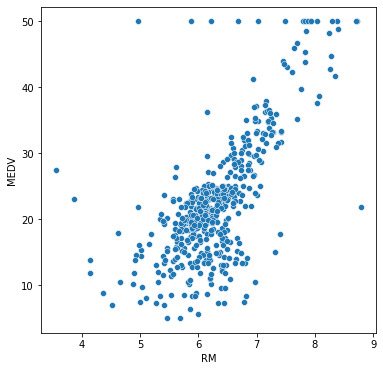

In [13]:
# Scatterplot to visulaize the relationship between RM and MEDV
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'RM', y = 'MEDV', data = df)

plt.show()

**Observations:**

- The price of the house seems to increase as the value of RM increases. This is expected as the price is generally higher for more rooms.

- There are a few outliers in a horizontal line as the MEDV value seems to be capped at 50.

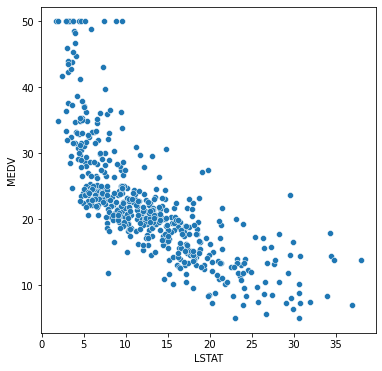

In [ ]:
# Scatterplot to visulaize the relationship between LSTAT and MEDV
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'LSTAT', y = 'MEDV', data = df)

plt.show()

**Observations:**

- The price of the house tends to decrease with an increase in LSTAT. This is also possible as the house price is lower in areas where lower status people live.
- There are few outliers and the data seems to be capped at 50.

### **Question 4** (8 Marks):
- **Create a scatter plot to visualize the relationship between the remaining features having significant correlations (>= 0.7 or <= -0.7) (4 Marks)**
    - INDUS and NOX
    - AGE and NOX
    - DIS and NOX
- **Write your observations from the plots (4 Marks)**

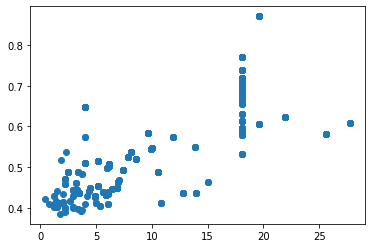

In [19]:
# Write you code here
plt.scatter(df['INDUS'], df['NOX'])

plt.show()

**Observations: As we can see the correlation seems to be positive between "Proportion of non-retail business acres per town" and "Nitric Oxide concentration (parts per 10 million)"**

In [ ]:
# Scatterplot to visualize the relationship between AGE and NOX
plt.figure(figsize = (6, 6))

# Write your code here

plt.show()

**Observations:____**

In [ ]:
# Scatterplot to visualize the relationship between DIS and NOX
plt.figure(figsize = (6, 6))

# Write your code here

plt.show()

**Observations:___**

We have seen that the variables LSTAT and RM have a linear relationship with the dependent variable MEDV. Also, there are significant relationships among few independent variables, which is not desirable for a linear regression model. Let's first split the dataset.

### **Split the dataset**

Let's split the data into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test sets.

In [ ]:
# Separate the dependent variable and indepedent variables
Y = df['MEDV_log']

X = df.drop(columns = {'MEDV', 'MEDV_log'})

# Add the intercept term
X = sm.add_constant(X)

In [ ]:
# splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

Next, we will check the multicollinearity in the training dataset.

### **Check for Multicollinearity**

We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

Features having a VIF score > 5 will be dropped / treated till all the features have a VIF score < 5

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

    feature         VIF
0     const  535.372593
1      CRIM    1.924114
2        ZN    2.743574
3     INDUS    3.999538
4      CHAS    1.076564
5       NOX    4.396157
6        RM    1.860950
7       AGE    3.150170
8       DIS    4.355469
9       RAD    8.345247
10      TAX   10.191941
11  PTRATIO    1.943409
12    LSTAT    2.861881


**Observations:**

- There are two variables with a high VIF - RAD and TAX (greater than 5). 
- Let's remove TAX as it has the highest VIF values and check the multicollinearity again.

### **Question 5:** Drop the column 'TAX' from the training data and check if multicollinearity is removed? (2 Marks)

In [ ]:
# Create the model after dropping TAX
X_train = X_train.drop(______)

# Check for VIF
print(checking_vif(X_train))

Now, we will create the linear regression model as the VIF is less than 5 for all the independent variables, and we can assume that multicollinearity has been removed between the variables.

### **Question 6:** Write the code to create the linear regression model and print the model summary. Write your observations from the model. (6 Marks)

**Hint:** Use the sm.OLS() model on the training data

In [ ]:
# Create the model
model1 = # Write your code here

# Get the model summary
model1.summary()

**Observations:_____**

### **Question 7:** Drop insignificant variables (variables with p-value > 0.05) from the above model and create the regression model again. (4 Marks)

### **Examining the significance of the model**

It is not enough to fit a multiple regression model to the data, it is necessary to check whether all the regression coefficients are significant or not. Significance here means whether the population regression parameters are significantly different from zero. 

From the above it may be noted that the regression coefficients corresponding to ZN, AGE, and INDUS are not statistically significant at level α = 0.05. In other words, the regression coefficients corresponding to these three are not significantly different from 0 in the population. Hence, we will eliminate the three features and create a new model.

In [ ]:
# Create the model after dropping columns 'MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS' from df DataFrame
Y = df['MEDV_log']

X = df.drop(________________) # Write your code here

X = sm.add_constant(X)

# Splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30 , random_state = 1)

# Create the model
model2 = sm.OLS(_____, ______).fit()

# Get the model summary
model2.summary()

Now, we will check the linear regression assumptions.

### **Checking the below linear regression assumptions**

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**

### **Question 8:** Write the code to check the above linear regression assumptions and provide insights. (8 Marks)

### **1. Check for mean residuals**

In [ ]:
residuals = ______

np.mean(residuals)

**Observations:____**

### **2. Check for homoscedasticity**

- Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to be homoscedastic.

- Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

- We'll use `Goldfeldquandt Test` to test the following hypothesis with alpha = 0.05:

    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedastic

In [ ]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [ ]:
name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(___, ____)

lzip(name, test)

**Observations:____**

### **3. Linearity of variables**

It states that the predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and the fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

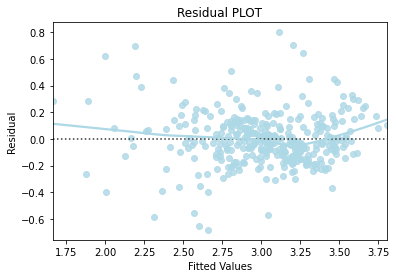

In [ ]:
# Predicted values
fitted = model2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = ______ y = ________, color = "lightblue", lowess = True)

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

**Observations:_____**

### **4. Normality of error terms**

The residuals should be normally distributed.

In [ ]:
# Plot histogram of residuals

# Write your code here

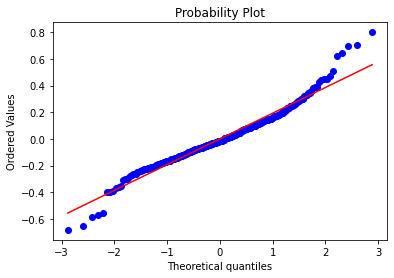

In [ ]:
# Plot q-q plot of residuals
import pylab

import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)

plt.show()

**Observations:_____**

### **Check the performance of the model on the train and test data set**

### **Question 9:** Write your observations by comparing model performance of train and test dataset (4 Marks)

In [ ]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )


# Checking model performance
model_pref(model2, X_train, X_test)  

**Observations:____**

### **Apply cross validation to improve the model and evaluate it using different evaluation metrics**

In [ ]:
# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.729 (+/- 0.232)
Mean Squared Error: 0.041 (+/- 0.023)


### **Question 10:** Get model Coefficients in a pandas dataframe with column 'Feature' having all the features and column 'Coefs' with all the corresponding Coefs. (4 Marks)

**Hint:** To get values please use coef.values

In [ ]:
coef = model2.______

pd.DataFrame({'Feature' : coef.________, 'Coefs' : coef._______})

In [ ]:
# Let us write the equation of the fit

Equation = "log (Price) = "

print(Equation, end = '\t')

for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

log (Price) =	( 4.649385823266652 ) *  const + ( -0.012500455079103941 ) *  CRIM + ( 0.11977319077019594 ) *  CHAS + ( -1.0562253516683235 ) *  NOX + ( 0.058906575109279144 ) *  RM + ( -0.044068890799406124 ) *  DIS + ( 0.007848474606244051 ) *  RAD + ( -0.048503620794999036 ) *  PTRATIO + ( -0.029277040479797338 ) *  LSTAT + 

**Note:** There might be slight variation in the coefficients depending on the library version you are using. There will be no deducting in marks for that as long as your observations are aligned with the output. In case, the coefficients vary too much, please make sure your code is correct.

### **Question 11:** Write the conclusions and business recommendations derived from the model. (10 Marks)

Write Conclusions here

Write Recommendations here